# FISH - Pipeline - A Python notebook to visualize FISH data

```
Author: Luis U. Aguilera
Contact Info: luis.aguilera@colostate.edu

Copyright (c) 2021 Munsky Group 
Colorado State University 
Licensed under BSD 3-Clause License.
```

### Libraries

In [12]:
# Importing libraries
import sys
import pathlib
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from  matplotlib.ticker import FuncFormatter
from matplotlib_scalebar.scalebar import ScaleBar
import matplotlib.pyplot as plt

### Path to source directories

In [13]:
# Defining directories
current_dir = pathlib.Path().absolute()
fa_dir = current_dir.parents[0].joinpath('src')

# Importing fish_analyses module
sys.path.append(str(fa_dir))
import fish_analyses as fa

# Path to credentials
desktop_path = pathlib.Path.home()/'Desktop'
path_to_config_file = desktop_path.joinpath('config.yml')


### Paths to folders

In [14]:
# Substring in folder
mandatory_substring='nuc_70__cyto_0__psfz_350__psfyx_160__ts_550_400'
connect_to_NAS = True
# Path to folder
data_folder_path = pathlib.Path('smFISH_images/Linda_smFISH_images/Confocal/20220714/MS2-CY5_Cyto543_560_woStim')


### Downloading data

In [15]:
%%capture
list_images, list_masks, complete_dataframe, number_images, number_color_channels = fa.Utilities.extract_images_masks_dataframe( data_folder_path,
                                                                                                                                mandatory_substring, 
                                                                                                                                path_to_config_file,
                                                                                                                                connect_to_NAS)

----
# User parameters
___

In [16]:
# Selecting cell to visualize
cell_id = 1
# minimal number of mRNA for consider a cluster a transcription site.
min_ts_size = 10 # Use None as the default value used on your exisiting dataframe

In [17]:
# Extracting image with cell and specific dataframe
subsection_image_with_selected_cell, df_spots_subsection_coordinates = fa.Utilities.image_cell_selection(cell_id=cell_id, 
                                                                                                         list_images=list_images, 
                                                                                                         dataframe=complete_dataframe)

cell located in image_id:  0


# Plotting composed-color channels

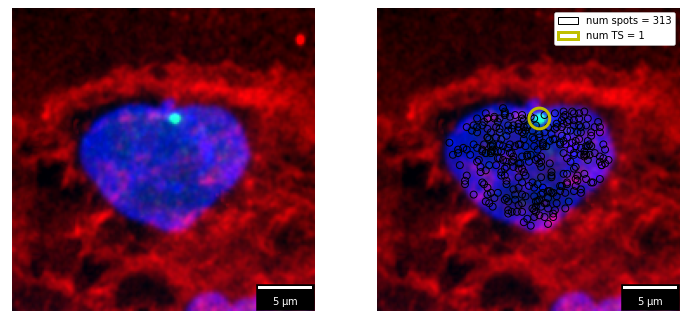

In [18]:
fa.Plots.plot_selected_cell_colors(image=subsection_image_with_selected_cell,
                                    df= df_spots_subsection_coordinates, 
                                    min_ts_size=min_ts_size, 
                                    show_spots=True,
                                    use_gaussian_filter = True,
                                    show_legend = True,
                                    microns_per_pixel = 0.16)

# Plotting detected spots on a single color channel 

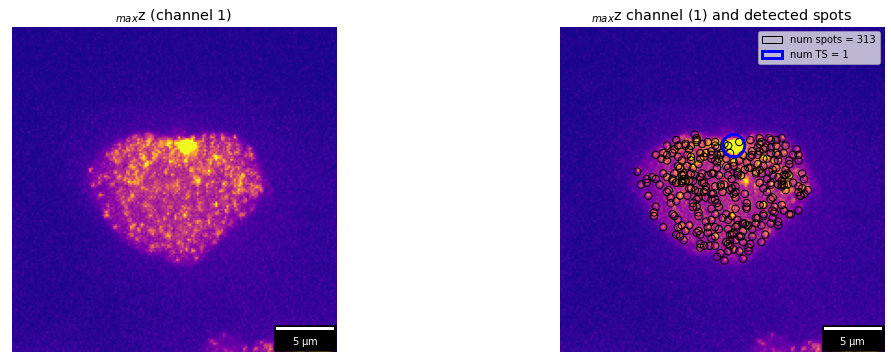

In [19]:
fa.Plots.plot_single_cell(image=subsection_image_with_selected_cell, 
                            df=df_spots_subsection_coordinates, 
                            selected_channel=1, 
                            min_ts_size=min_ts_size,
                            show_spots=True,
                            show_legend = True,
                            image_name=None,
                            microns_per_pixel = 0.16)

## Plotting all color channels

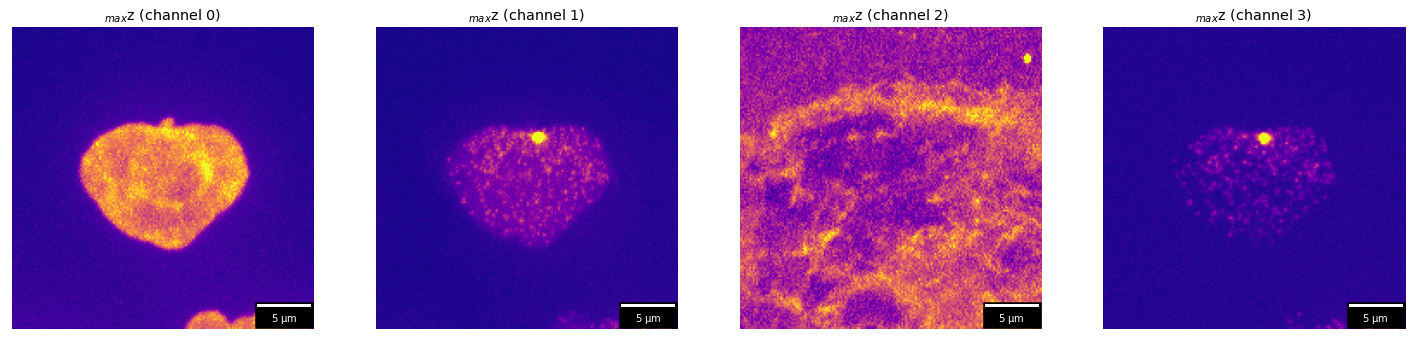

In [20]:
fa.Plots.plot_single_cell_all_channels(image=subsection_image_with_selected_cell, 
                                        df=df_spots_subsection_coordinates, 
                                        min_ts_size=min_ts_size,
                                        image_name=None,
                                        show_spots = False,
                                        microns_per_pixel=0.16)

# Plotting z-slices for all channels

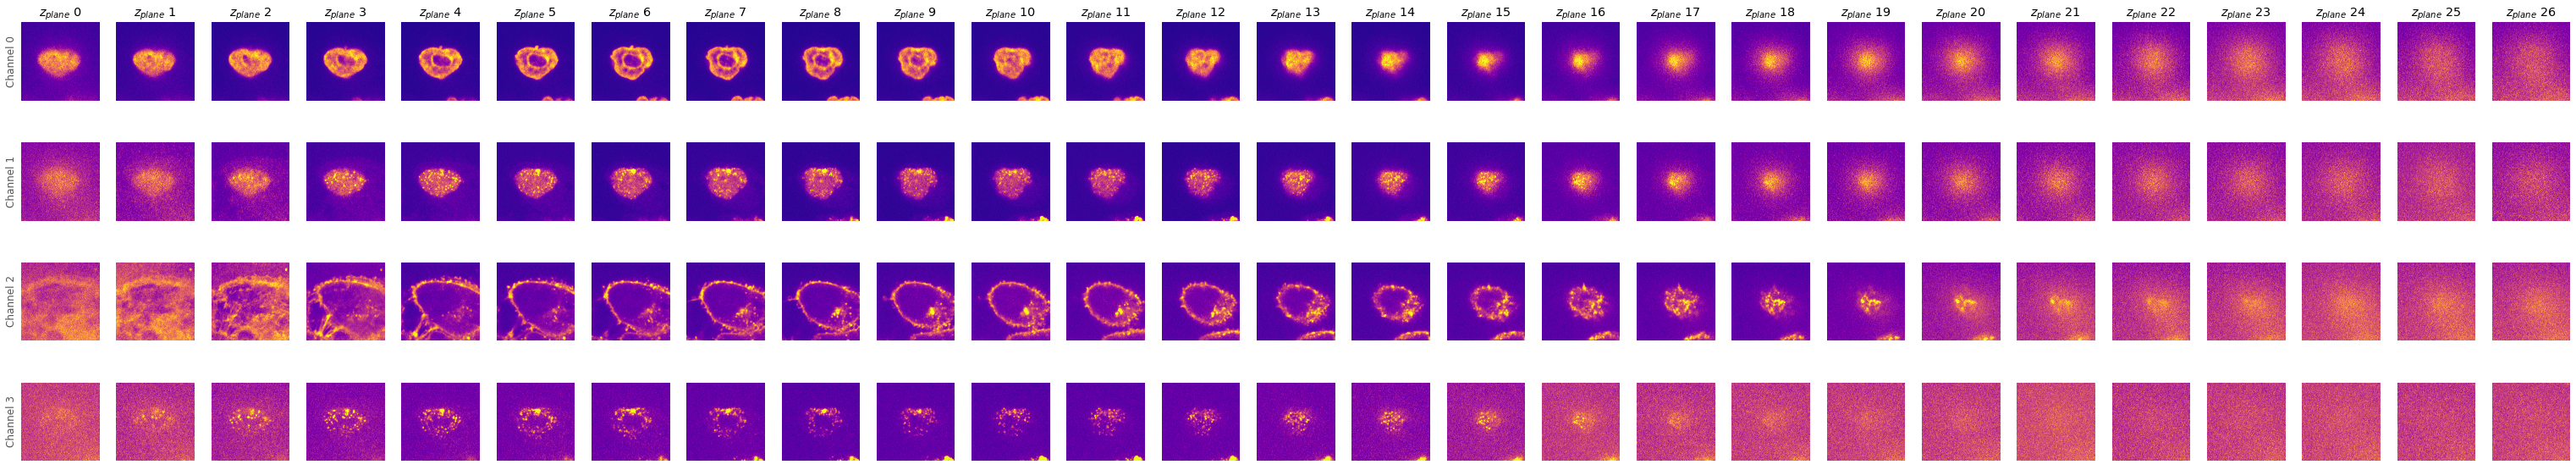

In [21]:
fa.Plots.plot_cell_all_z_planes(image=subsection_image_with_selected_cell, image_name=None )

# Plotting a color image for a Field of View

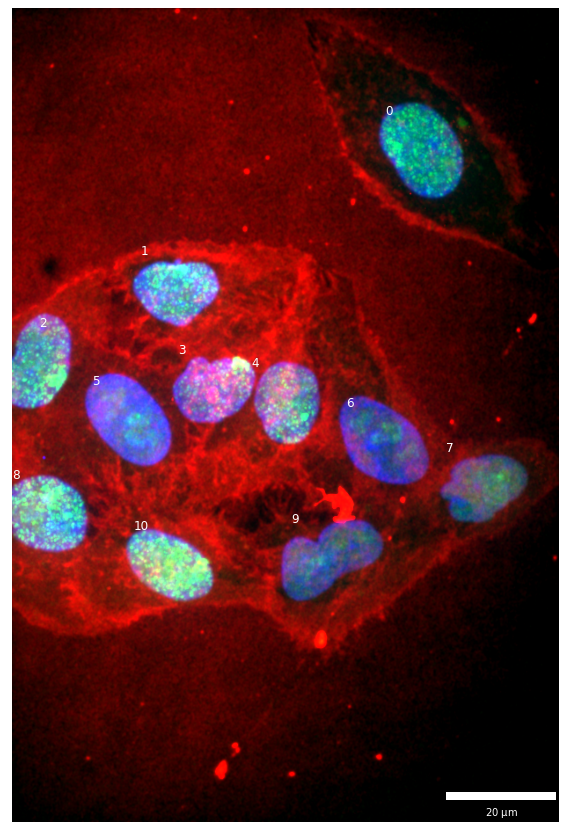

In [22]:
fa.Plots.plot_complete_fov(list_images=list_images,
                            df=complete_dataframe, 
                            number_of_selected_image = 0, 
                            use_GaussianFilter=True,
                            microns_per_pixel = 0.16,
                            show_cell_ids=True)

In [ ]:
def plot_single_cell_for_all_cells(image, df, selected_channel, spot_type=0,min_ts_size=4,show_spots=True,image_name=None,microns_per_pixel=None,show_legend = True,):
    # Extracting spot localization
    y_spot_locations, x_spot_locations, y_TS_locations, x_TS_locations, number_spots, number_TS = fa.Utilities.extract_spot_location_from_cell(df=df, spot_type=spot_type, min_ts_size= min_ts_size)
    # maximum and minimum values to plot
    max_visualization_value = np.percentile(np.max(image[:,: ,:,selected_channel],axis=0),99.5)
    min_visualization_value = np.percentile(np.max(image[:,: ,:,selected_channel],axis=0), 0)
    # Section that detects the number of subplots to show
    if show_spots == True:
        number_columns = 2
        x_plot_size =18
    else:
        number_columns = 1
        x_plot_size =9
    # Plotting
    _, axes = plt.subplots(nrows = 1, ncols = number_columns, figsize = (x_plot_size, 6))
    if show_spots == True:
        axis_index = axes[0]
    else:
        axis_index = axes
    # Visualizing image only
    axis_index.imshow( np.max(image[:,: ,:,selected_channel],axis=0),cmap = 'plasma',
                vmin=min_visualization_value, vmax=max_visualization_value)
    axis_index.grid(False)
    axis_index.set_xticks([])
    axis_index.set_yticks([])
    axis_index.set_title(r'$_{max}$z (channel '+str(selected_channel) +')')
    if not (microns_per_pixel is None): 
        scalebar = ScaleBar(dx = microns_per_pixel, units= 'um', length_fraction=0.25,location='lower right',box_color='k',color='w')
        axis_index.add_artist(scalebar)
    # Visualization image with detected spots
    if show_spots == True:
        axes[1].imshow( np.max(image[:,: ,:,selected_channel],axis=0),cmap = 'plasma',
                        vmin=min_visualization_value, vmax=max_visualization_value)
        axes[1].grid(False)
        axes[1].set_xticks([])
        axes[1].set_yticks([])
        axes[1].set_title(r'$_{max}$z channel ('+str(selected_channel) + ') and detected spots')
        if not (microns_per_pixel is None): 
            scalebar = ScaleBar(dx = microns_per_pixel, units= 'um', length_fraction=0.25,location='lower right',box_color='k',color='w')
            axes[1].add_artist(scalebar)
        if show_spots == True:
            # Plotting spots on image
            for i in range (number_spots):
                if i < number_spots-1:
                    circle1=plt.Circle((x_spot_locations[i], y_spot_locations[i]), 2, color = 'k', fill = False,lw=1)
                else:
                    circle1=plt.Circle((x_spot_locations[i], y_spot_locations[i]), 2, color = 'k', fill = False,lw=1, label='Spots = '+str(number_spots))
                axes[1].add_artist(circle1)     
            # Plotting TS
            if number_TS >0:
                for i in range (number_TS):
                    if i < number_TS-1:
                        circleTS=plt.Circle((x_TS_locations[i], y_TS_locations[i]), 6, color = 'b', fill = False,lw=3 )
                    else:
                        circleTS=plt.Circle((x_TS_locations[i], y_TS_locations[i]), 6, color = 'b', fill = False,lw=3, label= 'TS = '+str(number_TS) )
                    axes[1].add_artist(circleTS )
            # showing label with number of spots and ts.
            if show_legend == True: 
                legend = axes[1].legend(loc='upper right',facecolor= 'white')
                legend.get_frame().set_alpha(None)